<a href="https://colab.research.google.com/github/PoonamS25/Video-Semantic-Segmentation/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/image-segmentation-keras-master.zip -d .

Archive:  /content/image-segmentation-keras-master.zip
8ff47a2511587a088cbc91d5a38ca36951424509
   creating: ./image-segmentation-keras-master/
  inflating: ./image-segmentation-keras-master/.gitignore  
  inflating: ./image-segmentation-keras-master/.travis.yml  
  inflating: ./image-segmentation-keras-master/LICENSE  
  inflating: ./image-segmentation-keras-master/README.md  
   creating: ./image-segmentation-keras-master/docker/
  inflating: ./image-segmentation-keras-master/docker/Dockerfile  
  inflating: ./image-segmentation-keras-master/docker/README.md  
   creating: ./image-segmentation-keras-master/keras_segmentation/
 extracting: ./image-segmentation-keras-master/keras_segmentation/__init__.py  
  inflating: ./image-segmentation-keras-master/keras_segmentation/__main__.py  
  inflating: ./image-segmentation-keras-master/keras_segmentation/cli_interface.py  
   creating: ./image-segmentation-keras-master/keras_segmentation/data_utils/
 extracting: ./image-segmentation-keras-m

In [ ]:
!unzip /content/dataset1.zip -d .

Archive:  /content/dataset1.zip
   creating: ./dataset1/
   creating: ./dataset1/annotations_prepped_test/
 extracting: ./dataset1/annotations_prepped_test/0016E5_08085.png  
 extracting: ./dataset1/annotations_prepped_test/0016E5_08039.png  
 extracting: ./dataset1/annotations_prepped_test/0016E5_07995.png  
 extracting: ./dataset1/annotations_prepped_test/0016E5_08067.png  
 extracting: ./dataset1/annotations_prepped_test/0016E5_08073.png  
  inflating: ./dataset1/annotations_prepped_test/0016E5_08123.png  
  inflating: ./dataset1/annotations_prepped_test/0016E5_08159.png  
  inflating: ./dataset1/annotations_prepped_test/0016E5_08157.png  
 extracting: ./dataset1/annotations_prepped_test/0016E5_08047.png  
 extracting: ./dataset1/annotations_prepped_test/0016E5_08075.png  
  inflating: ./dataset1/annotations_prepped_test/0016E5_08121.png  
 extracting: ./dataset1/annotations_prepped_test/0016E5_08053.png  
  inflating: ./dataset1/annotations_prepped_test/0016E5_08119.png  
  inflati

In [1]:
#Mount to google drive
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 000000000001.jpg   000000286389.jpg
 000000000057.jpg   000000286423.jpg
 000000000106.jpg   000000286602.jpg
 000000000108.jpg   000000286630.jpg
 000000000188.jpg   000000286676.jpg
 000000000212.jpg   000000286721.jpg
 000000000408.jpg   000000286744.jpg
 000000000509.jpg   000000286776.jpg
 000000000535.jpg   000000286790.jpg
 000000000647.jpg   000000286843.jpg
 000000000686.jpg   000000286880.jpg
 000000000725.jpg   000000286922.jpg
 000000000809.jpg   000000286965.jpg
 000000000870.jpg   000000287055.jpg
 000000000979.jpg   000000287189.jpg
 000000001118.jpg   000000287271.jpg
 000000001127.jpg   000000287675.jpg
 000000001175.jpg   000000287756.jpg
 000000001286.jpg   000000287837.jpg
 000000001363.jpg   000000287902.jpg
 000000001367.jpg   000000288050.jpg
 000000001371.jpg   000000288083.jpg
 000000001550.jpg   000000288108.jpg
 000000001650.jpg   000000288175.jpg
 000000001702.jpg   000000288260.jpg
 000000002253.jpg   000000288377.jpg
 0000000023

In [4]:
%cd /mydrive
# import models.unet
# from models.unet import *
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=51 ,  input_height=416, input_width=608  )

# __init__.py inside mypackage folder
# from mypackage.mymodule import *

# Usage in another py fie
# import mypckage.mymodule
# from

/content/gdrive/My Drive
58900480/58889256 [==============================] - 14s 0us/step


In [7]:
model.train( 
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "checkpoints/vgg_unet_1" , epochs=5)

Verifying training dataset


100%|██████████| 367/367 [04:44<00:00,  1.29it/s]


Dataset verified! 
Epoch 1/5
512/512 [==============================] - ETA: 0s - loss: 0.8546 - accuracy: 0.7510
Epoch 1: saving model to checkpoints/vgg_unet_1.00001
512/512 [==============================] - 139s 239ms/step - loss: 0.8546 - accuracy: 0.7510
Epoch 2/5
512/512 [==============================] - ETA: 0s - loss: 0.5070 - accuracy: 0.8420
Epoch 2: saving model to checkpoints/vgg_unet_1.00002
512/512 [==============================] - 121s 236ms/step - loss: 0.5070 - accuracy: 0.8420
Epoch 3/5
512/512 [==============================] - ETA: 0s - loss: 0.3983 - accuracy: 0.8742
Epoch 3: saving model to checkpoints/vgg_unet_1.00003
512/512 [==============================] - 121s 236ms/step - loss: 0.3983 - accuracy: 0.8742
Epoch 4/5
512/512 [==============================] - ETA: 0s - loss: 0.3384 - accuracy: 0.8913
Epoch 4: saving model to checkpoints/vgg_unet_1.00004
512/512 [==============================] - 121s 235ms/step - loss: 0.3384 - accuracy: 0.8913
Epoch 5/5
512

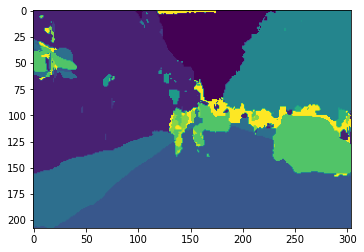

In [9]:
out = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="output.png"
)
import matplotlib.pyplot as plt
plt.imshow(out)


In [10]:
!python -m keras_segmentation predict_video --checkpoints_path="checkpoints/vgg_unet_1" --input 0 --display

2022-08-10 06:43:33.329439: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
loaded weights  checkpoints/vgg_unet_1.00005
[ERROR:0@4.338] global /io/opencv/modules/videoio/src/cap.cpp (595) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.6.0) /io/opencv/modules/videoio/src/cap_images.cpp:207: error: (-215:Assertion failed) !filename.empty() in function 'icvExtractPattern'


